# Importing Libraries 

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.rcParams["figure.figsize"]=(12,6)

# Data importing and Pre-processing 

In [10]:
df=pd.read_csv("datasets /LEAD.csv")

In [3]:
df.head()


,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01 00:00:00,NaN,0
1,32,2016-01-01 00:00:00,NaN,0
2,41,2016-01-01 00:00:00,NaN,0
3,55,2016-01-01 00:00:00,NaN,0
4,69,2016-01-01 00:00:00,NaN,0


In [4]:
df.tail()

,building_id,timestamp,meter_reading,anomaly
1749489,1316,2016-12-31 23:00:00,38.844,0
1749490,1318,2016-12-31 23:00:00,202.893,0
1749491,1319,2016-12-31 23:00:00,NaN,0
1749492,1323,2016-12-31 23:00:00,172.000,0
1749493,1353,2016-12-31 23:00:00,2.400,0


In [5]:
df.shape

(1749494, 4)

In [6]:
df.isnull().sum()

building_id           0
timestamp             0
meter_reading    107653
anomaly               0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   timestamp      object 
 2   meter_reading  float64
 3   anomaly        int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 53.4+ MB


In [7]:
data_converted = pd.concat([df[['timestamp']], df.drop('timestamp', axis=1).astype('float32')], axis=1)


In [8]:
df=data_converted

In [11]:
df['meter_reading'].fillna(df['meter_reading'].mean(), inplace=True)


In [15]:
df.columns

Index(['building_id', 'timestamp', 'meter_reading', 'anomaly'], dtype='object')

In [17]:
df.head()

,building_id,timestamp,meter_reading,anomaly
0,1,2016-01-01 00:00:00,NaN,0
1,32,2016-01-01 00:00:00,NaN,0
2,41,2016-01-01 00:00:00,NaN,0
3,55,2016-01-01 00:00:00,NaN,0
4,69,2016-01-01 00:00:00,NaN,0


In [19]:
df["meter_reading"].value_counts()

meter_reading
1.000       17059
18.000       8488
20.000       7510
21.000       6736
19.000       6567
            ...  
1077.110        1
1225.350        1
766.380         1
902.560         1
202.893         1
Name: count, Length: 191681, dtype: int64

In [20]:
df.to_csv("datasets /cleaned_LEAD.csv")

# Exploratory Data Analysis

In [21]:
mean_value = df['meter_reading'].mean()
median_value = df['meter_reading'].median()
std_dev_value = df['meter_reading'].std()
mode_value = df['meter_reading'].mode()[0]
mean_value, median_value, mode_value ,std_dev_value


(179.90183767124827, 84.1, 1.0, 395.91290921699823)

In [29]:
df["meter_reading"].max()


164781

In [32]:
df["anomaly"].value_counts()

anomaly
0    1712198
1      37296
Name: count, dtype: int64

In [30]:
max_meter_reading_index = df['meter_reading'].idxmax()

max_meter_reading_row = df.loc[max_meter_reading_index]
max_meter_reading_row

building_id                      801
timestamp        2016-02-04 11:00:00
meter_reading                6596.89
anomaly                            0
Name: 164781, dtype: object

In [23]:
df["meter_reading"].min()

0.0

<Axes: xlabel='meter_reading', ylabel='Count'>

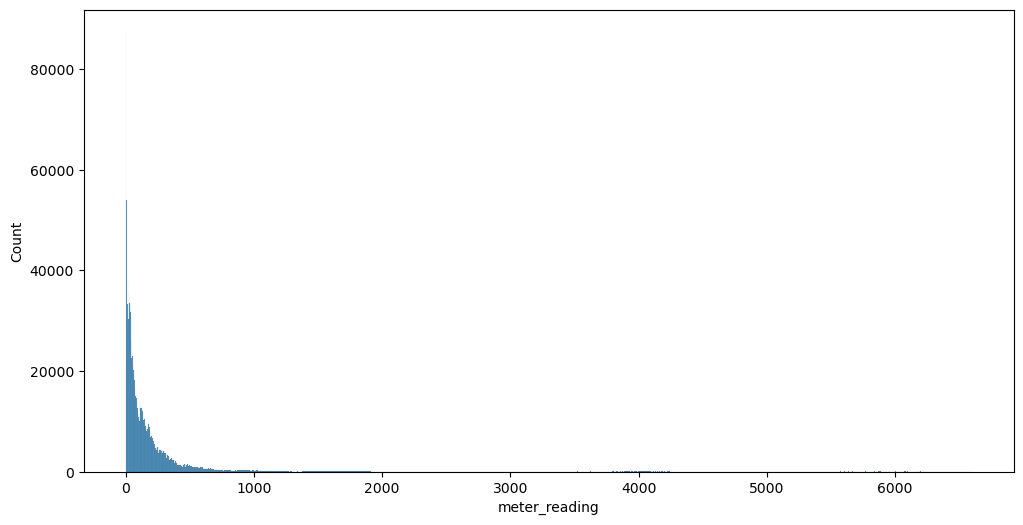

In [24]:
sns.histplot(df["meter_reading"])

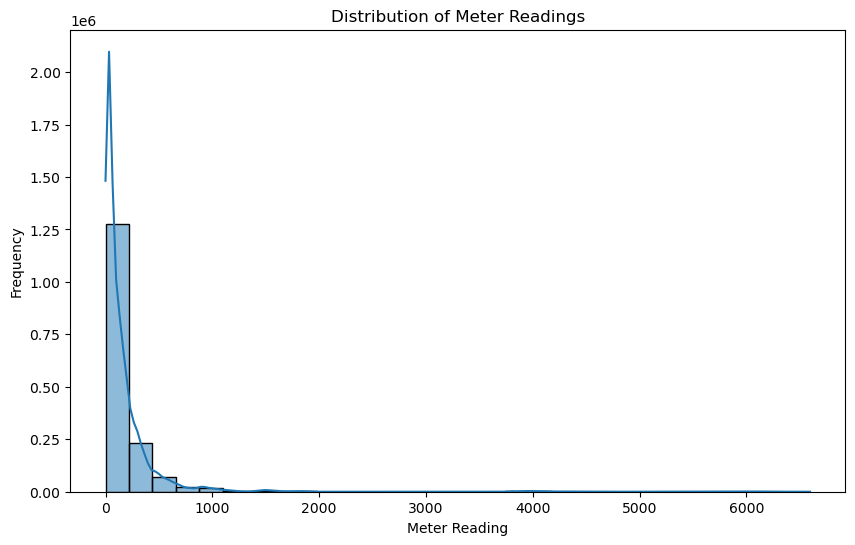

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(df['meter_reading'], bins=30, kde=True)
plt.title('Distribution of Meter Readings')
plt.xlabel('Meter Reading')
plt.ylabel('Frequency')
plt.show()


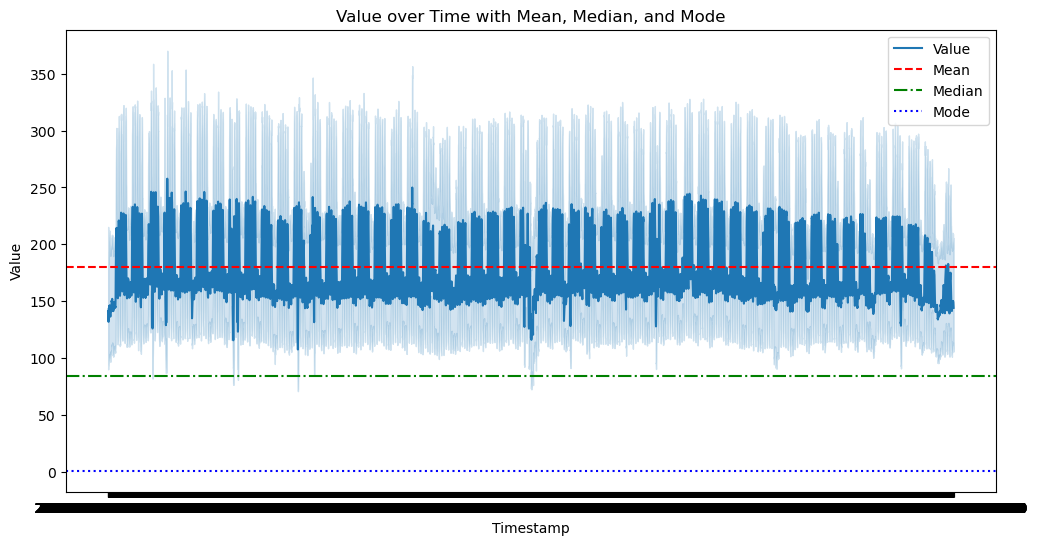

In [33]:
sns.lineplot(x='timestamp', y='meter_reading', data=df, label='Value')

plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean')
plt.axhline(y=median_value, color='g', linestyle='-.', label='Median')
plt.axhline(y=mode_value, color='b', linestyle=':', label='Mode')

plt.title('Value over Time with Mean, Median, and Mode')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

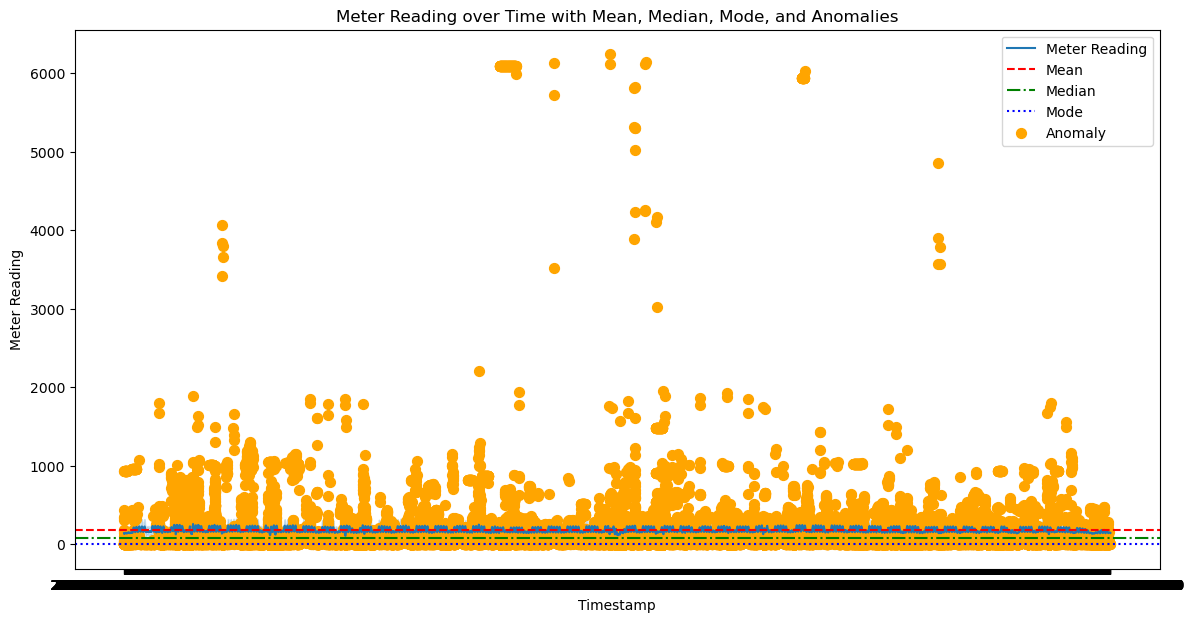

In [34]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='timestamp', y='meter_reading', data=df, label='Meter Reading')

plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean')
plt.axhline(y=median_value, color='g', linestyle='-.', label='Median')
plt.axhline(y=mode_value, color='b', linestyle=':', label='Mode')

anomalies = df[df['anomaly'] == 1]
plt.scatter(anomalies['timestamp'], anomalies['meter_reading'], color='orange', label='Anomaly', s=50)

plt.title('Meter Reading over Time with Mean, Median, Mode, and Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Meter Reading')
plt.legend()

plt.show()